## This notebook goal is to preprocess ECG data by applying those methods
- Mean removal
- Bandpass Filter (Butterworth 1 to 40 HZ)
- Normalization
- Resampling
- Segmention (round 4 heartbeats a segmant)

In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt 

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 100, 10

In [7]:
data =  np.fromfile('../Data/biometrics/train/s1.txt')

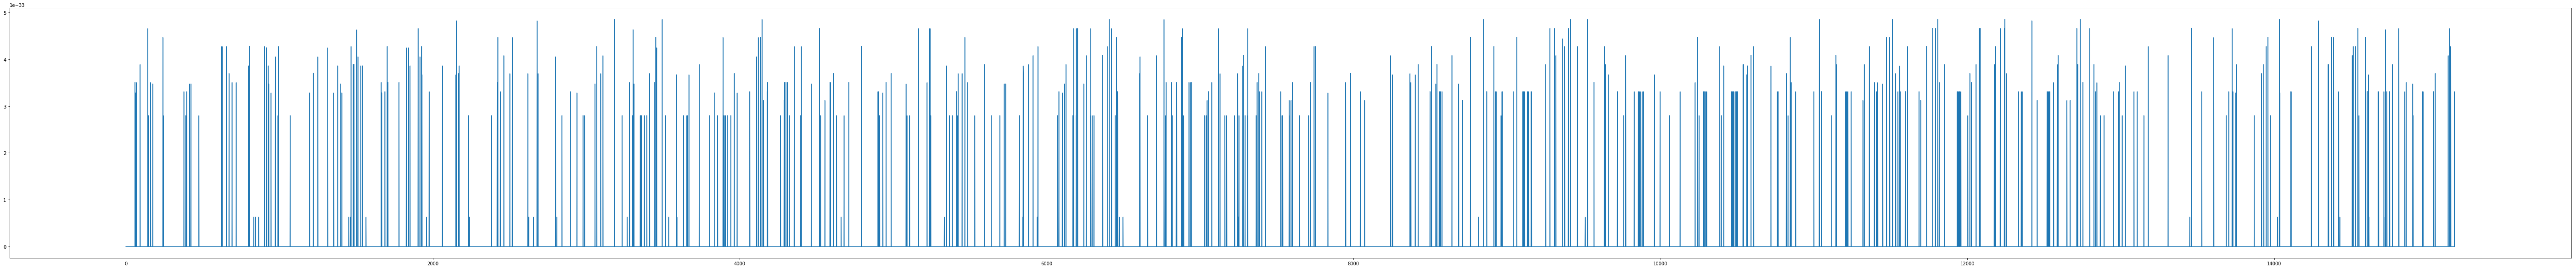

In [17]:
plt.plot(data)
plt.show()

In [19]:
data.mean()

1.2351508663181989e-34

In [20]:
def remove_mean(data):
    """Remove mean value from numpy array
    @param: numpy array
    @return: numpy array after mean removal
    """
    pass

In [ ]:
## todo impelement
## - the 5 preprocessing methods